In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df = pd.read_csv('preprocess.csv')
df = df.astype('float16')

In [4]:
X = df.loc[:, df.columns != 'prob']
y = df['prob']

In [5]:
y_one = pd.get_dummies(y)
y_one

,0.0,1.0,2.0,3.0,4.0
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1157,1,0,0,0,0
1158,1,0,0,0,0
1159,1,0,0,0,0
1160,1,0,0,0,0


## Original Data ##

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one, test_size=0.3, shuffle=True)

In [7]:
model = tf.keras.Sequential()
model.add(Dense(1024, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              31744     
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [8]:
history = model.fit(X_train, y_train, batch_size=5, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
163/163 - 2s - loss: 1.3753 - accuracy: 0.5732 - val_loss: 1.1372 - val_accuracy: 0.6074
Epoch 2/100
163/163 - 1s - loss: 1.1133 - accuracy: 0.6039 - val_loss: 1.3083 - val_accuracy: 0.5903
Epoch 3/100
163/163 - 1s - loss: 1.0869 - accuracy: 0.6052 - val_loss: 1.0491 - val_accuracy: 0.5903
Epoch 4/100
163/163 - 1s - loss: 1.0173 - accuracy: 0.6052 - val_loss: 1.0209 - val_accuracy: 0.6189
Epoch 5/100
163/163 - 1s - loss: 0.9745 - accuracy: 0.6162 - val_loss: 0.9838 - val_accuracy: 0.6046
Epoch 6/100
163/163 - 1s - loss: 0.9707 - accuracy: 0.6248 - val_loss: 0.9884 - val_accuracy: 0.6074
Epoch 7/100
163/163 - 1s - loss: 0.9428 - accuracy: 0.6298 - val_loss: 1.0023 - val_accuracy: 0.6304
Epoch 8/100
163/163 - 1s - loss: 0.9553 - accuracy: 0.6187 - val_loss: 0.9630 - val_accuracy: 0.5960
Epoch 9/100
163/163 - 1s - loss: 0.8931 - accuracy: 0.6359 - val_loss: 0.9387 - val_accuracy: 0.6275
Epoch 10/100
163/163 - 1s - loss: 0.8702 - accuracy: 0.6408 - val_loss: 0.9381 - val_accura

Epoch 82/100
163/163 - 1s - loss: 0.7557 - accuracy: 0.6814 - val_loss: 0.9044 - val_accuracy: 0.6476
Epoch 83/100
163/163 - 1s - loss: 0.7601 - accuracy: 0.6740 - val_loss: 0.9127 - val_accuracy: 0.6390
Epoch 84/100
163/163 - 1s - loss: 0.7497 - accuracy: 0.6802 - val_loss: 0.9462 - val_accuracy: 0.6218
Epoch 85/100
163/163 - 1s - loss: 0.7487 - accuracy: 0.6974 - val_loss: 0.8630 - val_accuracy: 0.6390
Epoch 86/100
163/163 - 1s - loss: 0.7396 - accuracy: 0.6851 - val_loss: 0.9247 - val_accuracy: 0.6476
Epoch 87/100
163/163 - 1s - loss: 0.7400 - accuracy: 0.6937 - val_loss: 0.8839 - val_accuracy: 0.6504
Epoch 88/100
163/163 - 1s - loss: 0.7669 - accuracy: 0.6790 - val_loss: 0.8727 - val_accuracy: 0.6332
Epoch 89/100
163/163 - 1s - loss: 0.7561 - accuracy: 0.6863 - val_loss: 0.9785 - val_accuracy: 0.6332
Epoch 90/100
163/163 - 1s - loss: 0.7590 - accuracy: 0.6925 - val_loss: 0.8938 - val_accuracy: 0.6418
Epoch 91/100
163/163 - 1s - loss: 0.7341 - accuracy: 0.6986 - val_loss: 1.0103 - v

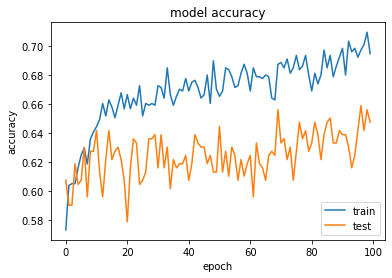

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Values Scaled ##

In [10]:
scaled_values = StandardScaler().fit_transform(X)
X2 = pd.DataFrame(scaled_values, columns = X.columns)
X2

,age,sex,presure_blood_resting,colesterol,cigarettes_per_day,smoker_years,sugar,max_heart_rate,res_heart_rate,blood_presure_sistoles,...,major_vessels_1.0,major_vessels_2.0,major_vessels_3.0,electrocardio_0.0,electrocardio_1.0,electrocardio_2.0,chest_pain_1.0,chest_pain_2.0,chest_pain_3.0,chest_pain_4.0
0,1.169922,0.776367,0.869629,-0.219482,2.275391,0.017792,2.548828,0.318359,-1.271484,0.904297,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,1.675781,4.246094,-0.455811,-0.518066,-0.843262
1,1.625000,0.776367,1.837891,0.928711,1.586914,1.483398,-0.392334,-1.568359,-0.958984,-0.435303,...,-0.339355,-0.253174,5.367188,-0.964355,-0.345703,1.675781,-0.235352,-0.455811,-0.518066,1.185547
2,1.625000,0.776367,-0.744629,-0.306152,0.213745,1.117188,-0.392334,-0.625488,0.137817,-1.328125,...,-0.339355,3.949219,-0.186401,-0.964355,-0.345703,1.675781,-0.235352,-0.455811,-0.518066,1.185547
3,-1.789062,0.776367,-0.098877,0.148804,-1.160156,-1.447266,-0.392334,1.981445,0.607910,1.127930,...,-0.339355,-0.253174,-0.186401,1.037109,-0.345703,-0.596680,-0.235352,-0.455811,1.929688,-0.843262
4,-1.333008,-1.288086,-0.098877,-0.847656,-1.160156,-1.447266,-0.392334,1.307617,-0.410645,-0.435303,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,1.675781,-0.235352,2.193359,-0.518066,-0.843262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1158,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1159,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262
1160,-0.422852,-1.288086,-0.228027,-0.235718,-0.404297,0.750488,-0.392334,0.003929,0.186768,-0.524902,...,-0.339355,-0.253174,-0.186401,-0.964355,-0.345703,-0.596680,-0.235352,-0.455811,-0.518066,-0.843262


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X2, y_one, test_size=0.3, shuffle=True)

In [12]:
modelS = tf.keras.Sequential()
modelS.add(Dense(1024, input_shape=(X.shape[1],), activation='relu'))
modelS.add(Dense(1024, activation='relu'))
modelS.add(Dense(512, activation='relu'))
modelS.add(Dense(512, activation='relu'))
modelS.add(Dense(256, activation='relu'))
modelS.add(Dense(128, activation='relu'))
modelS.add(Dense(64, activation='relu'))
modelS.add(Dense(32, activation='relu'))
modelS.add(Dense(16, activation='relu'))
modelS.add(Dense(5, activation='softmax'))
modelS.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelS.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              31744     
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 64)               

In [13]:
history = modelS.fit(X_train, y_train, batch_size=5, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
163/163 - 1s - loss: 0.9787 - accuracy: 0.6347 - val_loss: 0.8534 - val_accuracy: 0.6648
Epoch 2/100
163/163 - 1s - loss: 0.8158 - accuracy: 0.6433 - val_loss: 0.8601 - val_accuracy: 0.6275
Epoch 3/100
163/163 - 1s - loss: 0.7943 - accuracy: 0.6470 - val_loss: 0.8912 - val_accuracy: 0.6332
Epoch 4/100
163/163 - 1s - loss: 0.7519 - accuracy: 0.6827 - val_loss: 0.8467 - val_accuracy: 0.6476
Epoch 5/100
163/163 - 1s - loss: 0.7277 - accuracy: 0.6790 - val_loss: 0.8986 - val_accuracy: 0.6390
Epoch 6/100
163/163 - 1s - loss: 0.7447 - accuracy: 0.6851 - val_loss: 0.8438 - val_accuracy: 0.6590
Epoch 7/100
163/163 - 1s - loss: 0.6777 - accuracy: 0.6814 - val_loss: 0.9596 - val_accuracy: 0.6648
Epoch 8/100
163/163 - 1s - loss: 0.6599 - accuracy: 0.6999 - val_loss: 0.8761 - val_accuracy: 0.6848
Epoch 9/100
163/163 - 1s - loss: 0.6493 - accuracy: 0.7011 - val_loss: 0.9388 - val_accuracy: 0.6447
Epoch 10/100
163/163 - 1s - loss: 0.6288 - accuracy: 0.7306 - val_loss: 1.0530 - val_accura

Epoch 82/100
163/163 - 1s - loss: 0.2081 - accuracy: 0.9496 - val_loss: 2.1886 - val_accuracy: 0.7421
Epoch 83/100
163/163 - 1s - loss: 0.1297 - accuracy: 0.9840 - val_loss: 2.3114 - val_accuracy: 0.7564
Epoch 84/100
163/163 - 1s - loss: 0.0722 - accuracy: 0.9803 - val_loss: 4.0832 - val_accuracy: 0.7650
Epoch 85/100
163/163 - 1s - loss: 0.0232 - accuracy: 0.9926 - val_loss: 4.4250 - val_accuracy: 0.7564
Epoch 86/100
163/163 - 1s - loss: 0.0196 - accuracy: 0.9963 - val_loss: 7.1176 - val_accuracy: 0.7507
Epoch 87/100
163/163 - 1s - loss: 0.0533 - accuracy: 0.9877 - val_loss: 3.0255 - val_accuracy: 0.7393
Epoch 88/100
163/163 - 1s - loss: 0.0059 - accuracy: 0.9975 - val_loss: 4.5979 - val_accuracy: 0.7507
Epoch 89/100
163/163 - 1s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 4.8923 - val_accuracy: 0.7507
Epoch 90/100
163/163 - 1s - loss: 0.0013 - accuracy: 1.0000 - val_loss: 5.0013 - val_accuracy: 0.7593
Epoch 91/100
163/163 - 1s - loss: 4.7413e-04 - accuracy: 1.0000 - val_loss: 5.3209

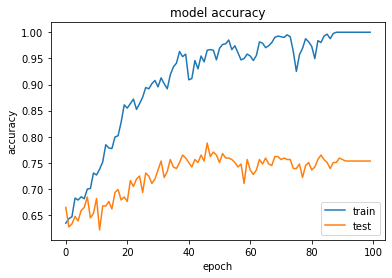

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

## Values Scaled and PCA applied ##

In [15]:
n_components = 5
pca = decomposition.PCA(n_components=n_components)
pca.fit(X2)


eigenvalues = sorted(list(pca.explained_variance_ratio_), reverse=True)
n_pcs= pca.components_.shape[0]
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = X.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]


X_pca = pd.DataFrame(pca.transform(X2), columns=most_important_names)
X_pca

,chest_pain_4.0,thal_3.0,blood_presure_sistoles,electrocardio_0.0,smoker_years
0,1.895274,1.389651,3.720848,0.756585,1.979019
1,3.938917,0.782944,0.035770,0.889870,2.146841
2,3.985318,1.270584,-1.995072,-0.254471,1.353131
3,-1.476376,2.592167,1.415434,-0.924263,-1.822792
4,-3.008264,2.959538,-0.491353,1.089865,-0.996214
...,...,...,...,...,...
1157,-1.291689,-1.554702,-1.420901,1.059466,0.382446
1158,-1.291689,-1.554702,-1.420901,1.059466,0.382446
1159,-1.291689,-1.554702,-1.420901,1.059466,0.382446
1160,-1.291689,-1.554702,-1.420901,1.059466,0.382446


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_one, test_size=0.3, shuffle=True)

In [17]:
modelSP = tf.keras.Sequential()
modelSP.add(Dense(1024, input_shape=(X_pca.shape[1],), activation='relu'))
modelSP.add(Dense(1024, activation='relu'))
modelSP.add(Dense(512, activation='relu'))
modelSP.add(Dense(512, activation='relu'))
modelSP.add(Dense(256, activation='relu'))
modelSP.add(Dense(128, activation='relu'))
modelSP.add(Dense(64, activation='relu'))
modelSP.add(Dense(32, activation='relu'))
modelSP.add(Dense(16, activation='relu'))
modelSP.add(Dense(5, activation='softmax'))
modelSP.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
modelSP.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              6144      
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_24 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_25 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_26 (Dense)             (None, 64)               

In [18]:
history = modelSP.fit(X_train, y_train, batch_size=5, epochs=100, verbose=2, validation_data=(X_test,y_test))

Epoch 1/100
163/163 - 1s - loss: 1.0352 - accuracy: 0.6261 - val_loss: 0.8644 - val_accuracy: 0.6734
Epoch 2/100
163/163 - 1s - loss: 0.9225 - accuracy: 0.6347 - val_loss: 0.8311 - val_accuracy: 0.6447
Epoch 3/100
163/163 - 1s - loss: 0.8866 - accuracy: 0.6384 - val_loss: 0.8202 - val_accuracy: 0.6590
Epoch 4/100
163/163 - 1s - loss: 0.8733 - accuracy: 0.6531 - val_loss: 0.9268 - val_accuracy: 0.6476
Epoch 5/100
163/163 - 1s - loss: 0.8531 - accuracy: 0.6458 - val_loss: 0.8007 - val_accuracy: 0.6676
Epoch 6/100
163/163 - 1s - loss: 0.8636 - accuracy: 0.6396 - val_loss: 0.7686 - val_accuracy: 0.6762
Epoch 7/100
163/163 - 1s - loss: 0.8319 - accuracy: 0.6359 - val_loss: 0.9577 - val_accuracy: 0.6332
Epoch 8/100
163/163 - 1s - loss: 0.8550 - accuracy: 0.6593 - val_loss: 0.7559 - val_accuracy: 0.6533
Epoch 9/100
163/163 - 1s - loss: 0.8372 - accuracy: 0.6433 - val_loss: 0.7681 - val_accuracy: 0.6590
Epoch 10/100
163/163 - 1s - loss: 0.8190 - accuracy: 0.6507 - val_loss: 0.7663 - val_accura

Epoch 82/100
163/163 - 1s - loss: 0.3366 - accuracy: 0.8721 - val_loss: 1.3964 - val_accuracy: 0.7192
Epoch 83/100
163/163 - 1s - loss: 0.4157 - accuracy: 0.8585 - val_loss: 1.0655 - val_accuracy: 0.7278
Epoch 84/100
163/163 - 1s - loss: 0.3619 - accuracy: 0.8573 - val_loss: 1.2057 - val_accuracy: 0.7364
Epoch 85/100
163/163 - 1s - loss: 0.3526 - accuracy: 0.8684 - val_loss: 1.6280 - val_accuracy: 0.7249
Epoch 86/100
163/163 - 1s - loss: 0.4382 - accuracy: 0.8413 - val_loss: 1.0272 - val_accuracy: 0.7364
Epoch 87/100
163/163 - 1s - loss: 0.3508 - accuracy: 0.8807 - val_loss: 1.0714 - val_accuracy: 0.6991
Epoch 88/100
163/163 - 1s - loss: 0.3679 - accuracy: 0.8549 - val_loss: 1.2992 - val_accuracy: 0.7335
Epoch 89/100
163/163 - 1s - loss: 0.3296 - accuracy: 0.8770 - val_loss: 1.5861 - val_accuracy: 0.7421
Epoch 90/100
163/163 - 1s - loss: 0.3022 - accuracy: 0.8918 - val_loss: 1.4361 - val_accuracy: 0.7564
Epoch 91/100
163/163 - 1s - loss: 0.2987 - accuracy: 0.8991 - val_loss: 1.3620 - v

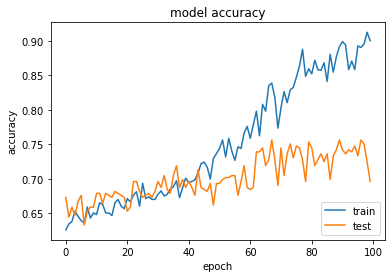

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()